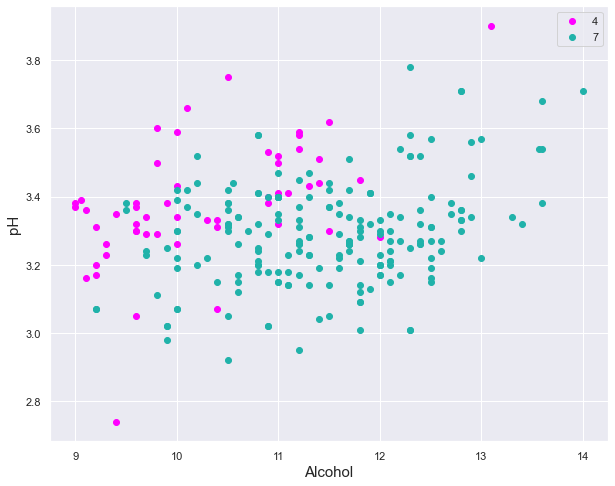

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
wine = pd.read_csv("Datasets/winequality-red4_7.csv")

X = wine[["alcohol", "pH"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y ==4:
        return 0
    else:
        return 1
         
# Create target value array
y = wine["quality"].map(make_labels).to_numpy()

# Plot the data
wine_quality = [4, 7]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for quality, color in zip(wine_quality, colors):
    temp_df = wine[wine.quality == quality]
    ax.scatter(temp_df.alcohol,
               temp_df.pH,
               c = color,
               label = quality, 
               )
    
ax.set_xlabel("Alcohol", fontsize = 15)
ax.set_ylabel("pH", fontsize = 15)
ax.legend()
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")


Stump Classification Report
              precision    recall  f1-score   support

           0       0.89      0.32      0.47        25
           1       0.82      0.99      0.89        76

    accuracy                           0.82       101
   macro avg       0.85      0.65      0.68       101
weighted avg       0.83      0.82      0.79       101
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.93      0.52      0.67        25
           1       0.86      0.99      0.92        76

    accuracy                           0.87       101
   macro avg       0.90      0.75      0.79       101
weighted avg       0.88      0.87      0.86       101
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.89      0.32      0.47        25
           1       0.82      0.99      0.89        76

    accuracy                           0.82       101
   macro avg       0.85      0.65      

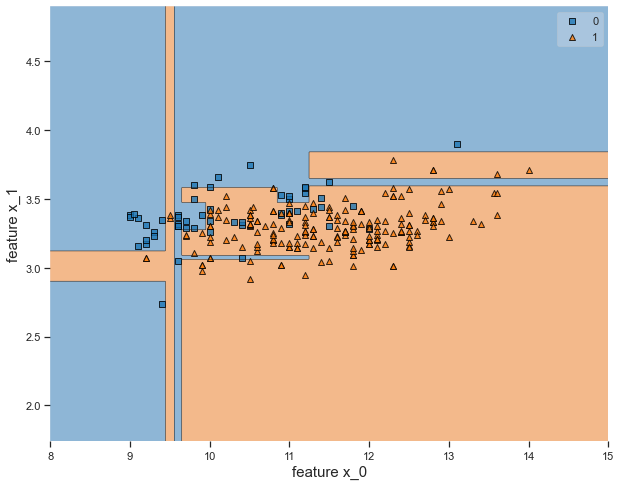

In [3]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

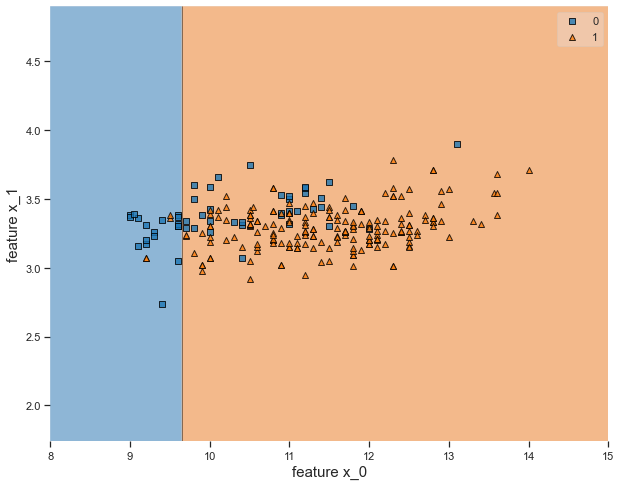

In [6]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()